This file is created to compare taxi pick up and drop off rate at lincoln center with nearby area, order by time.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
from datetime import datetime
import glob
import matplotlib.pyplot as plt
from scipy.misc import imread

In [2]:
fig_size = [12,9]
plt.rcParams["figure.figsize"] = fig_size

In [11]:
df = pd.read_csv('C:/Users/DELL/Downloads/yellow_tripdata_2016-01.csv',low_memory=False,nrows=5000000)

In [12]:
def areaCompare(lat,lon,dis,areaDis,df,se):
    if(se=='end'):
        timing='tpep_pickup_datetime'
        locateLat='pickup_latitude'
        locateLon='pickup_longitude'
        
    elif(se=='start'):
        timing='tpep_dropoff_datetime'
        locateLat='dropoff_latitude'
        locateLon='dropoff_longitude'
    else:
        print "wrong input for 'se' "
        return [],[]
    
    targetCount = {}
    areaCount = {}
    numExamples = df.shape[0]
    lat1 = math.radians(lat)
    lon1 = math.radians(lon)
    for i in range(numExamples):
        dh = datetime.strptime(df[timing][i], "%Y-%m-%d %H:%M:%S").hour
        dm = datetime.strptime(df[timing][i], "%Y-%m-%d %H:%M:%S").minute
        if(dm<30):
            dh=dh+0.25
        else:
            dh=dh+0.75
        lat2 =math.radians(df[locateLat][i])
        lon2 =math.radians(df[locateLon][i])
        delLat=lat2-lat1
        delLon=lon2-lon1
        angel = (math.sin(delLat/2))**2 + math.cos(lat1)*math.cos(lat2)*(math.sin(delLon))**2
        locDistance = 6371 * 2 * math.atan2(math.sqrt(angel),math.sqrt(1-angel))
        if(locDistance < areaDis):
            if(dh in areaCount):
                areaCount[dh] = areaCount[dh] +1
            else:
                areaCount[dh] = 1
            if(locDistance < dis):
                if(dh in targetCount):
                    targetCount[dh] = targetCount[dh] +1
                else:
                    targetCount[dh] = 1
            
    return targetCount,areaCount

In [13]:
#lincoln center coordinate
lat=40.772367
lon=-73.983070
#radius of range, kilemeter
distance = 0.2
areaDistance = 1

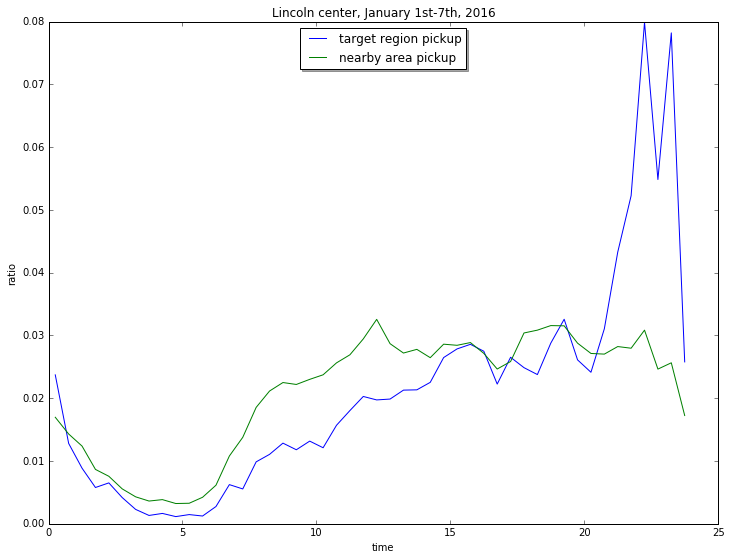

In [14]:
targetCount,areaCount = areaCompare(lat,lon,distance,areaDistance,df,'end')

keylist=targetCount.keys()
list.sort(keylist)
frequency=[]
areaFrequency=[]
for key in keylist:
    frequency.append(targetCount[key])
    areaFrequency.append(areaCount[key])
s = sum(frequency)
normF = [float(i)/s for i in frequency]
s = sum(areaFrequency)
normAF = [float(i)/s for i in areaFrequency]

fig, ax = plt.subplots()
ax.plot(keylist,normF, label='target region pickup')
ax.plot(keylist,normAF, label='nearby area pickup')
legend = ax.legend(loc='upper center', shadow=True)
plt.title('Lincoln center, January 1st-7th, 2016')
plt.xlabel('time')
plt.ylabel('ratio')
plt.show()

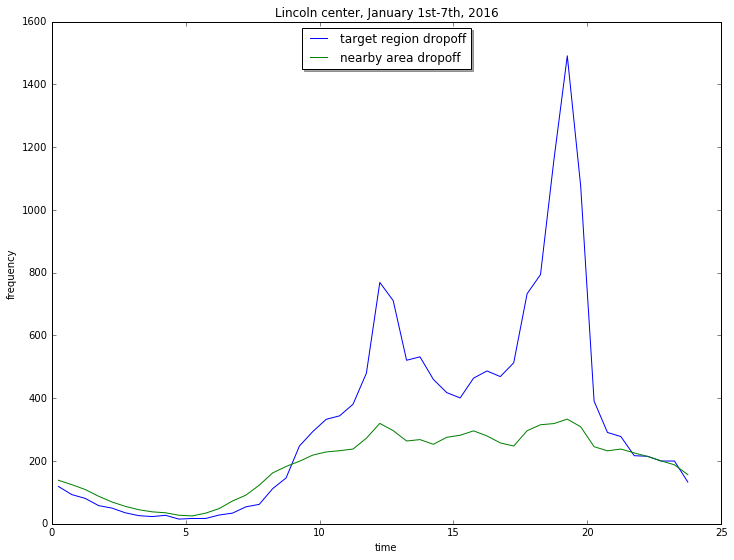

In [15]:
targetCount,areaCount = areaCompare(lat,lon,distance,areaDistance,df,'start')

keylist=targetCount.keys()
list.sort(keylist)
frequency=[]
areaFrequency=[]
for key in keylist:
    frequency.append(targetCount[key])
    areaFrequency.append(areaCount[key])

ratio = (distance/areaDistance)**2

normAF = [float(i)*ratio for i in areaFrequency]

fig, ax = plt.subplots()
ax.plot(keylist,frequency, label='target region dropoff')
ax.plot(keylist,normAF, label='nearby area dropoff')
legend = ax.legend(loc='upper center', shadow=True)
plt.title('Lincoln center, January 1st-7th, 2016')
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

The drop off rate higher than nearby area may imply the beginning of popular events, while the pick up rate higher than nearby area may imply ending of popular events.